In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [205]:
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/input_data/input_beach_sample_data.csv")

In [206]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,8/30/2013 8:00,20.3,1.18,0.891,0.080,3,9.4,8/30/2013 8:00,MontroseBeach201308300800
1,Osterman Beach,8/31/2013 23:00,21.5,3.51,1.538,0.231,4,9.4,8/31/2013 23:00,OstermanBeach201308312300
2,Ohio Street Beach,9/3/2013 3:00,21.9,4.97,1.039,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
3,Calumet Beach,9/3/2013 16:00,23.2,3.63,1.201,0.174,6,9.4,9/3/2013 16:00,CalumetBeach201309031600
4,63rd Street Beach,9/18/2013 10:00,18.9,7.56,1.517,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   4999 non-null   object 
 1   Measurement Timestamp        4999 non-null   object 
 2   Water Temperature            4999 non-null   float64
 3   Turbidity                    4999 non-null   float64
 4   Transducer Depth             4999 non-null   float64
 5   Wave Height                  4999 non-null   float64
 6   Wave Period                  4999 non-null   int64  
 7   Battery Life                 4999 non-null   float64
 8   Measurement Timestamp Label  4999 non-null   object 
 9   Measurement ID               4999 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.7+ KB


In [208]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,4999.000000,4999.000000,4999.000000,4999.00000,4999.000000,4999.000000
mean,17.914743,1.838820,1.541662,0.15644,3.580716,11.236267
std,1.648222,3.142792,0.170674,0.06609,1.446193,0.605133
min,13.100000,0.000000,-0.082000,0.01300,1.000000,8.000000
25%,16.600000,0.670000,1.413000,0.10900,3.000000,10.800000
50%,17.800000,1.030000,1.546000,0.14000,3.000000,11.200000
75%,19.200000,1.840000,1.676500,0.18500,4.000000,11.600000
max,27.100000,29.840000,2.058000,0.52600,10.000000,13.300000


In [209]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                     0
Measurement Timestamp          0
Water Temperature              0
Turbidity                      0
Transducer Depth               0
Wave Height                    0
Wave Period                    0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64


Checked that the Transducer Depth column has many null values, hence dropped it.

In [210]:
data.drop(columns='Transducer Depth',inplace=True)

In [211]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4994    False
4995    False
4996    False
4997    False
4998    False
Length: 4999, dtype: bool

In [212]:
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])

In [213]:
type(data['Measurement Timestamp'])

pandas.core.series.Series

In [214]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,2013-08-30 08:00:00,20.3,1.18,0.080,3,9.4,8/30/2013 8:00,MontroseBeach201308300800
1,Osterman Beach,2013-08-31 23:00:00,21.5,3.51,0.231,4,9.4,8/31/2013 23:00,OstermanBeach201308312300
2,Ohio Street Beach,2013-09-03 03:00:00,21.9,4.97,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
3,Calumet Beach,2013-09-03 16:00:00,23.2,3.63,0.174,6,9.4,9/3/2013 16:00,CalumetBeach201309031600
4,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000


In [215]:
data.set_index('Measurement Timestamp')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,
2013-08-30 08:00:00,Montrose Beach,20.3,1.18,0.080,3,9.4,8/30/2013 8:00,MontroseBeach201308300800
2013-08-31 23:00:00,Osterman Beach,21.5,3.51,0.231,4,9.4,8/31/2013 23:00,OstermanBeach201308312300
2013-09-03 03:00:00,Ohio Street Beach,21.9,4.97,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
2013-09-03 16:00:00,Calumet Beach,23.2,3.63,0.174,6,9.4,9/3/2013 16:00,CalumetBeach201309031600
2013-09-18 10:00:00,63rd Street Beach,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000
...,...,...,...,...,...,...,...,...
2014-07-12 19:00:00,Calumet Beach,16.5,1.25,0.066,5,12.0,7/12/2014 19:00,CalumetBeach201407121900
2014-07-12 19:00:00,Montrose Beach,14.9,0.62,0.107,6,12.4,7/12/2014 19:00,MontroseBeach201407121900
2014-07-12 19:00:00,Ohio Street Beach,20.2,1.01,0.097,3,11.9,7/12/2014 19:00,OhioStreetBeach201407121900


In [216]:
# Checking whether Measurement Timestamp column is datetime / timeseries column 
pd.api.types.is_datetime64_any_dtype(data['Measurement Timestamp'])

True

In [217]:
data.columns

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns:
'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

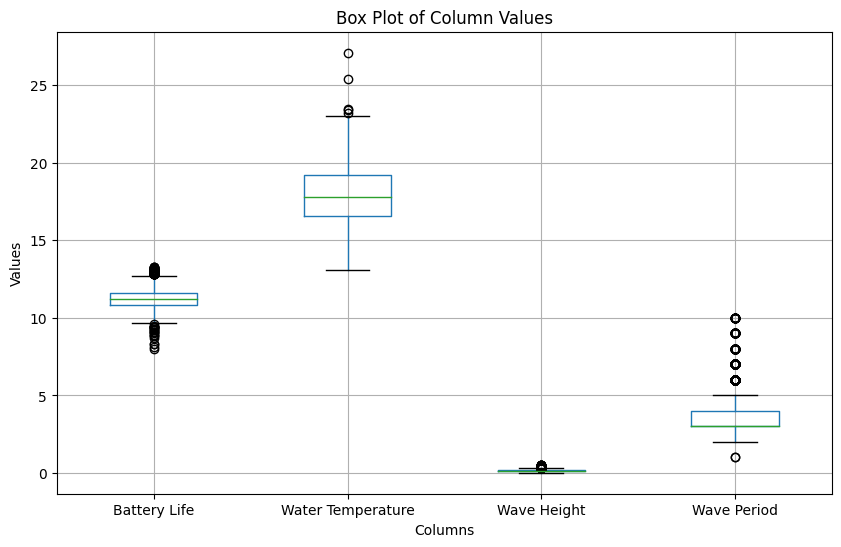

In [218]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [219]:
data = data.drop(data.loc[data['Wave Height']<-999,:].index)

In [220]:
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,2013-08-30 08:00:00,20.3,1.18,0.080,3,9.4,8/30/2013 8:00,MontroseBeach201308300800
1,Osterman Beach,2013-08-31 23:00:00,21.5,3.51,0.231,4,9.4,8/31/2013 23:00,OstermanBeach201308312300
2,Ohio Street Beach,2013-09-03 03:00:00,21.9,4.97,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
3,Calumet Beach,2013-09-03 16:00:00,23.2,3.63,0.174,6,9.4,9/3/2013 16:00,CalumetBeach201309031600
4,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000
...,...,...,...,...,...,...,...,...,...
4994,Calumet Beach,2014-07-12 19:00:00,16.5,1.25,0.066,5,12.0,7/12/2014 19:00,CalumetBeach201407121900
4995,Montrose Beach,2014-07-12 19:00:00,14.9,0.62,0.107,6,12.4,7/12/2014 19:00,MontroseBeach201407121900
4996,Ohio Street Beach,2014-07-12 19:00:00,20.2,1.01,0.097,3,11.9,7/12/2014 19:00,OhioStreetBeach201407121900
4997,Osterman Beach,2014-07-12 19:00:00,14.3,0.63,0.104,6,12.2,7/12/2014 19:00,OstermanBeach201407121900


Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [221]:
data1 = data.drop(columns=['Beach Name', 'Measurement Timestamp Label','Measurement ID'])

In [222]:
data1.head()

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,2013-08-30 08:00:00,20.3,1.18,0.080,3,9.4
1,2013-08-31 23:00:00,21.5,3.51,0.231,4,9.4
2,2013-09-03 03:00:00,21.9,4.97,0.241,7,9.4
3,2013-09-03 16:00:00,23.2,3.63,0.174,6,9.4
4,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0


In [223]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,2013-08-30 08:00:00,20.3,1.18,0.080,3,9.4,8/30/2013 8:00,MontroseBeach201308300800
1,Osterman Beach,2013-08-31 23:00:00,21.5,3.51,0.231,4,9.4,8/31/2013 23:00,OstermanBeach201308312300
2,Ohio Street Beach,2013-09-03 03:00:00,21.9,4.97,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
3,Calumet Beach,2013-09-03 16:00:00,23.2,3.63,0.174,6,9.4,9/3/2013 16:00,CalumetBeach201309031600
4,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000


In [224]:
data[data['Beach Name'] == 'Ohio Street Beach']

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
2,Ohio Street Beach,2013-09-03 03:00:00,21.9,4.97,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
386,Ohio Street Beach,2014-06-05 12:00:00,16.9,1.60,0.159,3,12.8,6/5/2014 12:00,OhioStreetBeach201406051200
439,Ohio Street Beach,2014-06-06 14:00:00,18.8,0.70,0.135,2,12.4,6/6/2014 14:00,OhioStreetBeach201406061400
446,Ohio Street Beach,2014-06-06 17:00:00,19.8,0.78,0.162,3,12.3,6/6/2014 17:00,OhioStreetBeach201406061700
449,Ohio Street Beach,2014-06-06 18:00:00,19.7,0.77,0.130,3,12.3,6/6/2014 18:00,OhioStreetBeach201406061800
...,...,...,...,...,...,...,...,...,...
4972,Ohio Street Beach,2014-07-12 15:00:00,20.6,1.16,0.146,2,11.9,7/12/2014 15:00,OhioStreetBeach201407121500
4978,Ohio Street Beach,2014-07-12 16:00:00,20.3,0.95,0.108,3,11.9,7/12/2014 16:00,OhioStreetBeach201407121600
4984,Ohio Street Beach,2014-07-12 17:00:00,20.3,1.07,0.138,2,11.9,7/12/2014 17:00,OhioStreetBeach201407121700
4990,Ohio Street Beach,2014-07-12 18:00:00,20.2,0.92,0.132,2,11.9,7/12/2014 18:00,OhioStreetBeach201407121800


In [225]:
data[data['Beach Name'] == 'Calumet Beach']

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
3,Calumet Beach,2013-09-03 16:00:00,23.2,3.63,0.174,6,9.4,9/3/2013 16:00,CalumetBeach201309031600
6,Calumet Beach,2014-05-28 12:00:00,16.2,1.26,0.147,4,11.7,5/28/2014 12:00,CalumetBeach201405281200
8,Calumet Beach,2014-05-28 13:00:00,16.3,1.28,0.162,4,11.7,5/28/2014 13:00,CalumetBeach201405281300
10,Calumet Beach,2014-05-28 14:00:00,16.5,1.32,0.185,4,11.7,5/28/2014 14:00,CalumetBeach201405281400
12,Calumet Beach,2014-05-28 15:00:00,16.8,1.31,0.196,4,11.7,5/28/2014 15:00,CalumetBeach201405281500
...,...,...,...,...,...,...,...,...,...
4970,Calumet Beach,2014-07-12 15:00:00,17.9,1.85,0.092,2,12.0,7/12/2014 15:00,CalumetBeach201407121500
4976,Calumet Beach,2014-07-12 16:00:00,17.4,1.60,0.095,5,12.0,7/12/2014 16:00,CalumetBeach201407121600
4982,Calumet Beach,2014-07-12 17:00:00,17.1,1.41,0.086,2,12.0,7/12/2014 17:00,CalumetBeach201407121700
4988,Calumet Beach,2014-07-12 18:00:00,16.9,1.17,0.081,2,12.0,7/12/2014 18:00,CalumetBeach201407121800


### Sorting

In [226]:
data_sorted = data.sort_values(by=['Beach Name','Measurement Timestamp'])
# data_sorted = data.sort_values(by=['Measurement Timestamp','Beach Name'])

In [227]:
data_sorted.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
4,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000
861,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9,12.2,6/12/2014 12:00,63rdStreetBeach201406121200
865,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10,12.2,6/12/2014 13:00,63rdStreetBeach201406121300
869,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4,12.2,6/12/2014 14:00,63rdStreetBeach201406121400
875,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4,12.1,6/12/2014 15:00,63rdStreetBeach201406121500


In [228]:
data_sorted['Beach Name'].unique()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

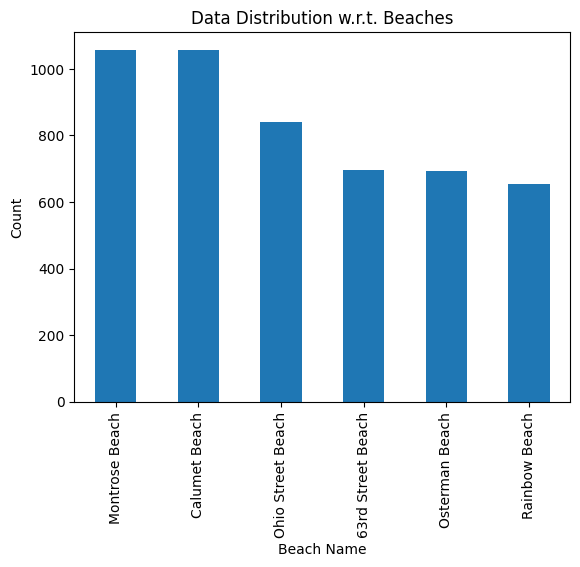

In [229]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [230]:
data_sorted_ohio_b = data_sorted[data_sorted['Beach Name']=='Ohio Street Beach']

In [231]:
data_sorted_ohio_b

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
2,Ohio Street Beach,2013-09-03 03:00:00,21.9,4.97,0.241,7,9.4,9/3/2013 3:00,OhioStreetBeach201309030300
386,Ohio Street Beach,2014-06-05 12:00:00,16.9,1.60,0.159,3,12.8,6/5/2014 12:00,OhioStreetBeach201406051200
439,Ohio Street Beach,2014-06-06 14:00:00,18.8,0.70,0.135,2,12.4,6/6/2014 14:00,OhioStreetBeach201406061400
446,Ohio Street Beach,2014-06-06 17:00:00,19.8,0.78,0.162,3,12.3,6/6/2014 17:00,OhioStreetBeach201406061700
449,Ohio Street Beach,2014-06-06 18:00:00,19.7,0.77,0.130,3,12.3,6/6/2014 18:00,OhioStreetBeach201406061800
...,...,...,...,...,...,...,...,...,...
4972,Ohio Street Beach,2014-07-12 15:00:00,20.6,1.16,0.146,2,11.9,7/12/2014 15:00,OhioStreetBeach201407121500
4978,Ohio Street Beach,2014-07-12 16:00:00,20.3,0.95,0.108,3,11.9,7/12/2014 16:00,OhioStreetBeach201407121600
4984,Ohio Street Beach,2014-07-12 17:00:00,20.3,1.07,0.138,2,11.9,7/12/2014 17:00,OhioStreetBeach201407121700
4990,Ohio Street Beach,2014-07-12 18:00:00,20.2,0.92,0.132,2,11.9,7/12/2014 18:00,OhioStreetBeach201407121800


In [232]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Cleaned/Cleaned and Sorted/data_sorted.csv")

In [233]:
data_sorted_ohio_b.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Cleaned/Cleaned and Sorted/data_sorted_ohio_b.csv")

In [234]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Encoding:

Doing the encoding using the get_dummies() method in pandas because UMAP does not allow categorical data.

In [235]:
encoded_data = pd.get_dummies(data_sorted, columns=['Beach Name'])
encoded_data

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
4,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000,1,0,0,0,0,0
861,2014-06-12 12:00:00,25.4,3.45,0.031,9,12.2,6/12/2014 12:00,63rdStreetBeach201406121200,1,0,0,0,0,0
865,2014-06-12 13:00:00,18.1,3.31,0.339,10,12.2,6/12/2014 13:00,63rdStreetBeach201406121300,1,0,0,0,0,0
869,2014-06-12 14:00:00,17.5,2.93,0.136,4,12.2,6/12/2014 14:00,63rdStreetBeach201406121400,1,0,0,0,0,0
875,2014-06-12 15:00:00,17.3,2.22,0.143,4,12.1,6/12/2014 15:00,63rdStreetBeach201406121500,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,2014-07-12 15:00:00,14.5,0.97,0.086,3,11.7,7/12/2014 15:00,RainbowBeach201407121500,0,0,0,0,0,1
4980,2014-07-12 16:00:00,14.0,1.15,0.093,10,11.7,7/12/2014 16:00,RainbowBeach201407121600,0,0,0,0,0,1
4986,2014-07-12 17:00:00,13.6,1.10,0.095,4,11.7,7/12/2014 17:00,RainbowBeach201407121700,0,0,0,0,0,1
4992,2014-07-12 18:00:00,13.3,1.08,0.093,8,11.6,7/12/2014 18:00,RainbowBeach201407121800,0,0,0,0,0,1


In [236]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [237]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [238]:
encoded_data.columns

Index(['Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID',
       'Beach Name_63rd Street Beach', 'Beach Name_Calumet Beach',
       'Beach Name_Montrose Beach', 'Beach Name_Ohio Street Beach',
       'Beach Name_Osterman Beach', 'Beach Name_Rainbow Beach'],
      dtype='object')

Dropping the columns **Measurement Timestamp Label, Measurement ID**


In [239]:
encoded_data_pre = encoded_data.drop(columns=['Measurement Timestamp Label','Measurement ID'])  

In [240]:
encoded_data_pre

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
4,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,1,0,0,0,0,0
861,2014-06-12 12:00:00,25.4,3.45,0.031,9,12.2,1,0,0,0,0,0
865,2014-06-12 13:00:00,18.1,3.31,0.339,10,12.2,1,0,0,0,0,0
869,2014-06-12 14:00:00,17.5,2.93,0.136,4,12.2,1,0,0,0,0,0
875,2014-06-12 15:00:00,17.3,2.22,0.143,4,12.1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4974,2014-07-12 15:00:00,14.5,0.97,0.086,3,11.7,0,0,0,0,0,1
4980,2014-07-12 16:00:00,14.0,1.15,0.093,10,11.7,0,0,0,0,0,1
4986,2014-07-12 17:00:00,13.6,1.10,0.095,4,11.7,0,0,0,0,0,1
4992,2014-07-12 18:00:00,13.3,1.08,0.093,8,11.6,0,0,0,0,0,1


###Standardizing the dataset

In [241]:
scaler = StandardScaler()
encoded_data_pre[num_cols] = scaler.fit_transform(encoded_data_pre[num_cols])

##Converting the measurement timestamp to a numeric value:

In [242]:
# timeseries_data = encoded_data_pre['Measurement Timestamp']

# reference_time = timeseries_data.min()

# encoded_data_pre['Measurement Timestamp'] = (timeseries_data - reference_time).dt.total_seconds() / 60

In [243]:
# Convert datetime to numeric representation
# encoded_data_pre['Measurement Timestamp'] = pd.to_datetime(encoded_data_pre['Measurement Timestamp'])
encoded_data_pre['Measurement Timestamp'] = encoded_data_pre['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [244]:
encoded_data_pre.isna().sum()

Measurement Timestamp           0
Water Temperature               0
Turbidity                       0
Wave Height                     0
Wave Period                     0
Battery Life                    0
Beach Name_63rd Street Beach    0
Beach Name_Calumet Beach        0
Beach Name_Montrose Beach       0
Beach Name_Ohio Street Beach    0
Beach Name_Osterman Beach       0
Beach Name_Rainbow Beach        0
dtype: int64

There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [245]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store 
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(encoded_data_pre) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

encoded_data_pre=pd.DataFrame(data=np.round(new_array), columns=encoded_data_pre.columns)

In [246]:
encoded_data_pre.head()

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
0,1.379498e+09,1.0,2.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.402574e+09,5.0,1.0,-2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.402578e+09,0.0,0.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.402582e+09,-0.0,0.0,-0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.402585e+09,-0.0,0.0,-0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


random_state --> This parameter is used to set the random seed for reproducibility

n_neighbors --> This parameter determines the number of nearest neighbors used to construct the local neighborhood for each data point. In UMAP, the algorithm builds a graph representation of the data, and n_neighbors specifies the number of nearest neighbors to consider when constructing the graph. Increasing this value may result in a more global view of the data, while decreasing it may provide a more local perspective.


n_components --> This parameter sets the number of dimensions in the lower-dimensional space to which the data will be projected

min_dist: This parameter controls the minimum distance between points in the lower-dimensional embedding. A higher value of min_dist enforces greater spacing between points, potentially resulting in a clearer visualization

In [247]:
# Apply UMAP to the entire DataFrame
SEED = 43
reducer = umap.UMAP(random_state=SEED, 
                    n_neighbors = 12, 
                    n_components = 2,
                    min_dist = 0.5)

# reducer = umap.UMAP(random_state=43)
umap_result = reducer.fit_transform(encoded_data_pre)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [248]:
umap_result

array([[-8.331748 ,  1.12176  ],
       [-4.259151 , -1.2859458],
       [-3.9528573, -1.8022249],
       ...,
       [10.689799 ,  6.890459 ],
       [22.141838 , -2.1073706],
       [ 7.969891 , 22.66588  ]], dtype=float32)

## Finding the patterens with respect to the Measurement Timestamp:

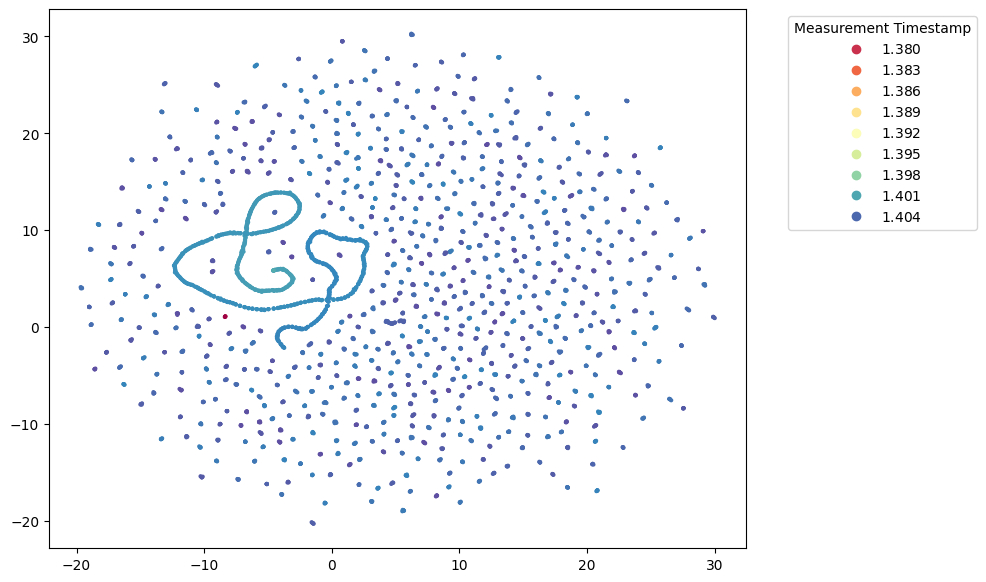

In [249]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=encoded_data_pre['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

## Finding the patterens with respect to the beaches:

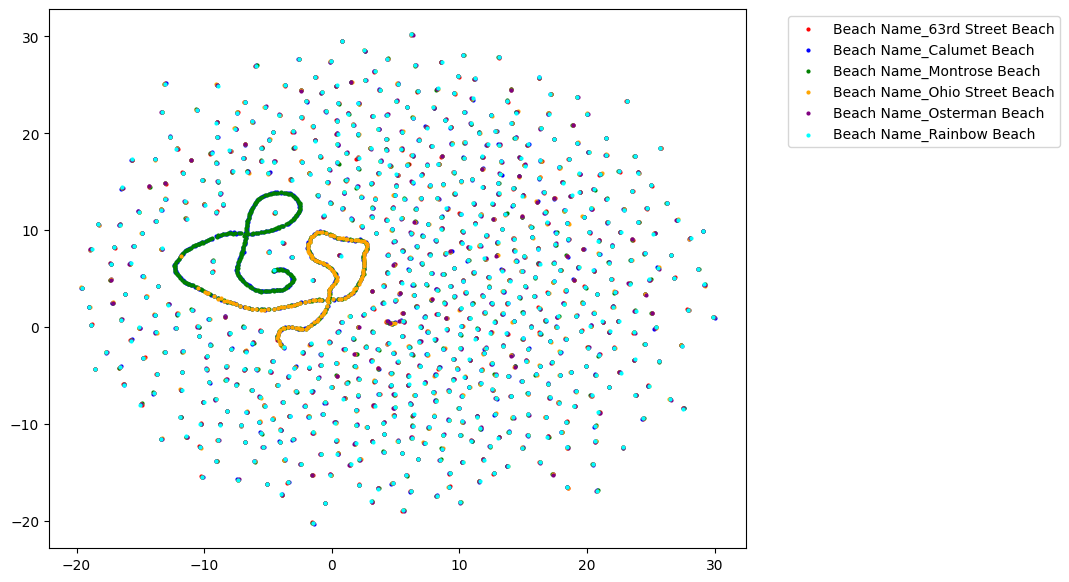

In [250]:
fig, ax = plt.subplots(figsize=(9, 7))

beach_names = ['Beach Name_63rd Street Beach', 'Beach Name_Calumet Beach', 'Beach Name_Montrose Beach',
               'Beach Name_Ohio Street Beach', 'Beach Name_Osterman Beach', 'Beach Name_Rainbow Beach']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Create a scatter plot of the UMAP embedding
for i, beach in enumerate(beach_names):
    indices = encoded_data_pre[beach].astype(bool)
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], s=4,color=colors[i], label=beach)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [251]:
encoded_data_pre

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
0,1.379498e+09,1.0,2.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.402574e+09,5.0,1.0,-2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.402578e+09,0.0,0.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.402582e+09,-0.0,0.0,-0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.402585e+09,-0.0,0.0,-0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,1.405177e+09,-2.0,-0.0,-1.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4995,1.405181e+09,-2.0,-0.0,-1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.405184e+09,-3.0,-0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,1.405188e+09,-3.0,-0.0,-1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [252]:
encoded_data = pd.get_dummies(data_sorted, columns=['Beach Name'])
encoded_data

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
4,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000,1,0,0,0,0,0
861,2014-06-12 12:00:00,25.4,3.45,0.031,9,12.2,6/12/2014 12:00,63rdStreetBeach201406121200,1,0,0,0,0,0
865,2014-06-12 13:00:00,18.1,3.31,0.339,10,12.2,6/12/2014 13:00,63rdStreetBeach201406121300,1,0,0,0,0,0
869,2014-06-12 14:00:00,17.5,2.93,0.136,4,12.2,6/12/2014 14:00,63rdStreetBeach201406121400,1,0,0,0,0,0
875,2014-06-12 15:00:00,17.3,2.22,0.143,4,12.1,6/12/2014 15:00,63rdStreetBeach201406121500,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,2014-07-12 15:00:00,14.5,0.97,0.086,3,11.7,7/12/2014 15:00,RainbowBeach201407121500,0,0,0,0,0,1
4980,2014-07-12 16:00:00,14.0,1.15,0.093,10,11.7,7/12/2014 16:00,RainbowBeach201407121600,0,0,0,0,0,1
4986,2014-07-12 17:00:00,13.6,1.10,0.095,4,11.7,7/12/2014 17:00,RainbowBeach201407121700,0,0,0,0,0,1
4992,2014-07-12 18:00:00,13.3,1.08,0.093,8,11.6,7/12/2014 18:00,RainbowBeach201407121800,0,0,0,0,0,1


#Using Label Encoder to convert categorical values into numeric

In [253]:
from sklearn.preprocessing import LabelEncoder

In [254]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
4,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000
861,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9,12.2,6/12/2014 12:00,63rdStreetBeach201406121200
865,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10,12.2,6/12/2014 13:00,63rdStreetBeach201406121300
869,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4,12.2,6/12/2014 14:00,63rdStreetBeach201406121400
875,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4,12.1,6/12/2014 15:00,63rdStreetBeach201406121500
...,...,...,...,...,...,...,...,...,...
4974,Rainbow Beach,2014-07-12 15:00:00,14.5,0.97,0.086,3,11.7,7/12/2014 15:00,RainbowBeach201407121500
4980,Rainbow Beach,2014-07-12 16:00:00,14.0,1.15,0.093,10,11.7,7/12/2014 16:00,RainbowBeach201407121600
4986,Rainbow Beach,2014-07-12 17:00:00,13.6,1.10,0.095,4,11.7,7/12/2014 17:00,RainbowBeach201407121700
4992,Rainbow Beach,2014-07-12 18:00:00,13.3,1.08,0.093,8,11.6,7/12/2014 18:00,RainbowBeach201407121800


In [255]:
data_sorted_label_enc = data_sorted
data_sorted_label_enc.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
4,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4,11.0,9/18/2013 10:00,63rdStreetBeach201309181000
861,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9,12.2,6/12/2014 12:00,63rdStreetBeach201406121200
865,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10,12.2,6/12/2014 13:00,63rdStreetBeach201406121300
869,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4,12.2,6/12/2014 14:00,63rdStreetBeach201406121400
875,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4,12.1,6/12/2014 15:00,63rdStreetBeach201406121500


In [256]:
lblEn = LabelEncoder()

data_sorted_label_enc['Beach Name'] =lblEn.fit_transform(data_sorted_label_enc['Beach Name'])

In [257]:
lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted_label_enc['Beach Name'].unique()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

In [258]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [259]:
data_sorted_label_enc = data_sorted_label_enc.drop(columns=['Measurement Timestamp Label','Measurement ID']) 

In [260]:
scaler = StandardScaler()
data_sorted_label_enc[num_cols] = scaler.fit_transform(data_sorted_label_enc[num_cols])

In [261]:
timeseries_data = data_sorted_label_enc['Measurement Timestamp']

In [262]:
# reference_time = timeseries_data.min()
# data_sorted_label_enc['Measurement Timestamp'] = (timeseries_data - reference_time).dt.total_seconds() / 60
# data_sorted_label_enc.isna().sum()

In [263]:
# Converting the timestamp to numerical values

data_sorted_label_enc['Measurement Timestamp'] = data_sorted_label_enc['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [264]:
data_sorted_label_enc['Measurement Timestamp']

4       1.379498e+09
861     1.402574e+09
865     1.402578e+09
869     1.402582e+09
875     1.402585e+09
            ...     
4974    1.405177e+09
4980    1.405181e+09
4986    1.405184e+09
4992    1.405188e+09
4998    1.405192e+09
Name: Measurement Timestamp, Length: 4999, dtype: float64

In [265]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store 
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted_label_enc) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

data_sorted_label_enc=pd.DataFrame(data=np.round(new_array), columns=data_sorted_label_enc.columns)

In [266]:
# Apply UMAP to the entire DataFrame
SEED = 43
# reducer = umap.UMAP(random_state=SEED, 
#                     n_neighbors = 5, 
#                     n_components = 2,
#                     min_dist = 0.7)
reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted_label_enc)

umap_result

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[ 19.52643  ,   7.9314623],
       [ -1.5682414,   7.1432514],
       [ -1.6558862,   7.260602 ],
       ...,
       [ -2.8462582,  12.236865 ],
       [  1.9187672, -12.580263 ],
       [ -6.40942  ,   1.322258 ]], dtype=float32)

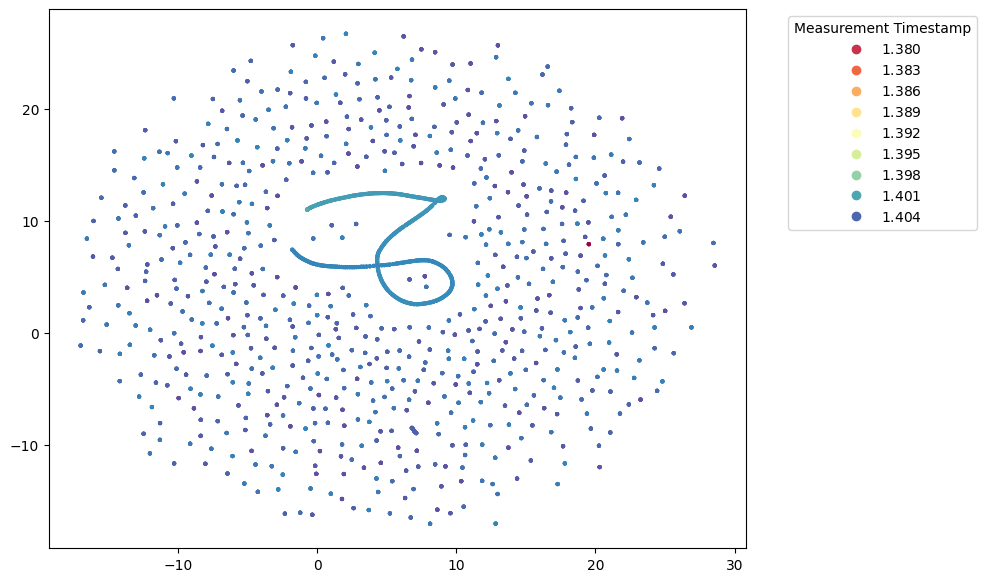

In [267]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted_label_enc['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

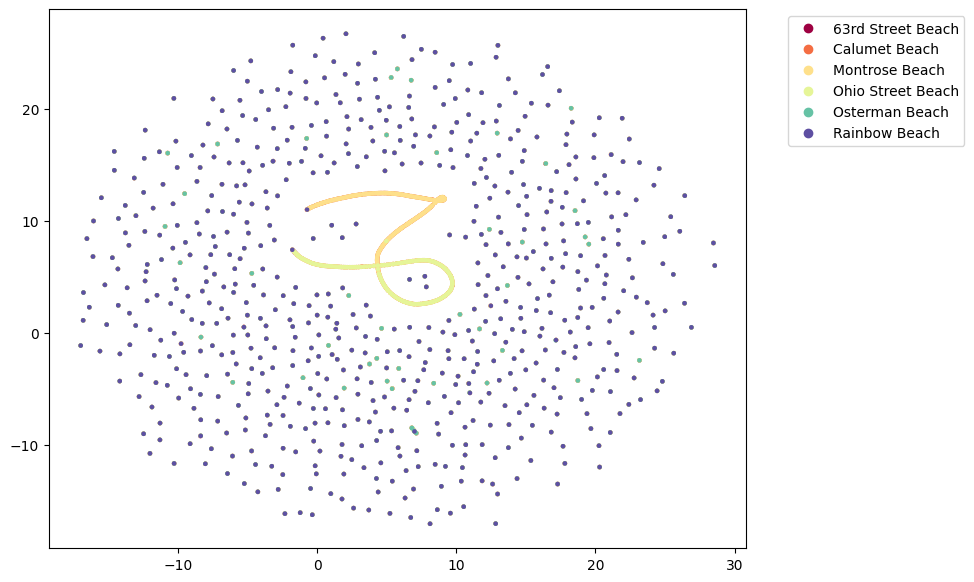

In [268]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted_label_enc['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Exporting data for the paraview.

In [269]:
data_sorted_label_enc

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0.0,1.379498e+09,1.0,2.0,-0.0,0.0,-0.0
1,0.0,1.402574e+09,5.0,1.0,-2.0,4.0,2.0
2,0.0,1.402578e+09,0.0,0.0,3.0,4.0,2.0
3,0.0,1.402582e+09,-0.0,0.0,-0.0,0.0,2.0
4,0.0,1.402585e+09,-0.0,0.0,-0.0,0.0,1.0
...,...,...,...,...,...,...,...
4994,5.0,1.405177e+09,-2.0,-0.0,-1.0,-0.0,1.0
4995,5.0,1.405181e+09,-2.0,-0.0,-1.0,4.0,1.0
4996,5.0,1.405184e+09,-3.0,-0.0,-1.0,0.0,1.0
4997,5.0,1.405188e+09,-3.0,-0.0,-1.0,3.0,1.0


In [270]:
# Creating the dataframe from the array umap_result
umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1'])

In [271]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted_label_enc_out = pd.concat([data_sorted_label_enc,umap_result_df], axis=1)

In [272]:
# Exporting the csv file
data_sorted_label_enc_out.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview_data/data_sorted_label_enc_out.csv")